# BANK LOAN ANALYSIS REPORT

### Import Library

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_excel(r"D:\Tài Liệu Học\PROJECT DATA ANALYST\Project\Bank Loan Analysis\financial_loan.xlsx")
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


### Metadata of data

In [32]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 38576
Number of columns: 24


In [33]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat T

### Data types

In [34]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [35]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


### Total Loan Applications

In [36]:
datetime = df.assign(time = df['issue_date'].dt.to_period('M'))

total_loan_applications = (datetime.groupby('time', as_index=False)['id']
                           .count()
                           .rename(columns={'id': 'total_applications'}))

total_loan_applications['time'] = total_loan_applications['time'].astype(str)

total_loan_applications

,time,total_applications
0,2021-01,2332
1,2021-02,2279
2,2021-03,2627
3,2021-04,2755
4,2021-05,2911
5,2021-06,3184
6,2021-07,3366
7,2021-08,3441
8,2021-09,3536
9,2021-10,3796


### Month-to-date Total Loan Applications

In [37]:
lasted_issue_date = df['issue_date'].max()
lasted_year = lasted_issue_date.year
lasted_month = lasted_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == lasted_year) & (df['issue_date'].dt.month == lasted_month)]

mtd_loan_application = mtd_data['id'].count()

print(f"Month-to-date Total Loan Applications (for {lasted_issue_date.strftime('%B %Y')}): {mtd_loan_application}")

Month-to-date Total Loan Applications (for December 2021): 4314


### Total Funded Amout

In [38]:
total_funded_amout = df['loan_amount'].sum()
mtd_funded_amout_millions = round(total_funded_amout / 1000000, 2)
print(f"Total Funded Amount: ${mtd_funded_amout_millions}M")

Total Funded Amount: $435.76M


### Month-to-date Total Funded Amout

In [39]:
mtd_funded_amout = mtd_data['loan_amount'].sum()
mtd_funded_amout_millions = round(mtd_funded_amout / 1000000, 2)
print(f"Month-to-date Total Funded Amount (for {lasted_issue_date.strftime('%B %Y')}): ${mtd_funded_amout_millions}M")

Month-to-date Total Funded Amount (for December 2021): $53.98M


### Total Amount Recieved

In [40]:
total_amount_recieved = df['total_payment'].sum()
total_amount_recieved_millions = round(total_amount_recieved / 1000000, 2)
print(f"Total Amount Received: ${total_amount_recieved_millions}M")

Total Amount Received: $473.07M


### Month-to-date Total Amount Recieved

In [41]:
mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = round(mtd_total_amount_received / 1000000, 2)
print(f"Month-to-date Total Amount Received (for {lasted_issue_date.strftime('%B %Y')}): ${mtd_total_amount_received_millions}M")

Month-to-date Total Amount Received (for December 2021): $58.07M


### Average Interest Rate

In [42]:
average_interest_rate = df['int_rate'].mean()
average_interest_rate_percentage = round(average_interest_rate * 100, 2)
print(f"Average Interest Rate: {average_interest_rate_percentage}%")

Average Interest Rate: 12.05%


### Average Debt-to-Income Ratio

In [43]:
average_dti_ratio = df['dti'].mean()
average_dti_ratio_percentage = round(average_dti_ratio * 100, 2)
print(f"Average DTI Ratio: {average_dti_ratio_percentage}%")

Average DTI Ratio: 13.33%


### Good Loan Metrics

In [44]:
# Filter applications which have loan_status is 'Fully Paid' or 'Current'
good_loans = df[(df['loan_status'].isin(['Fully Paid', 'Current']))]    

# Calculate metrics for Good Loans
good_loans_applications = good_loans['id'].count()
good_loans_funded_amount = good_loans['loan_amount'].sum()
good_loans_received = good_loans['total_payment'].sum()

# Convert to Million
good_loans_funded_amount_million = round(good_loans_funded_amount / 1000000, 2)
good_loans_received_million = round(good_loans_received / 1000000, 2)

good_loans_percentage = round((good_loans_applications / df['id'].count()) * 100, 2)

print(f"Good Loans Applications: {good_loans_applications}")
print(f"Good Loans Funded Amount: ${good_loans_funded_amount_million}M")
print(f"Good Loans Received Amount: ${good_loans_received_million}M")
print(f"Good Loans Percentage: {good_loans_percentage}%")

Good Loans Applications: 33243
Good Loans Funded Amount: $370.22M
Good Loans Received Amount: $435.79M
Good Loans Percentage: 86.18%


### Bad Loans Metrics

In [45]:
# Filter applications which have loan_status is 'Charged Off'
bad_loans = df[df['loan_status'] == 'Charged Off']

# Calculate metrics for Bad Loans
bad_loans_applications = bad_loans['id'].count()
bad_loans_funded_amount = bad_loans['loan_amount'].sum()
bad_loans_received = bad_loans['total_payment'].sum()

# Convert to Million
bad_loans_funded_amount_million = round(bad_loans_funded_amount / 1000000, 2)
bad_loans_received_million = round(bad_loans_received / 1000000, 2)

bad_loans_percentage = round((bad_loans_applications / df['id'].count()) * 100, 2)

print(f"Bad Loans Applications: {bad_loans_applications}")
print(f"Bad Loans Funded Amount: ${bad_loans_funded_amount_million}M")
print(f"Bad Loans Received Amount: ${bad_loans_received_million}M")
print(f"Bad Loans Percentage: {bad_loans_percentage}%")

Bad Loans Applications: 5333
Bad Loans Funded Amount: $65.53M
Bad Loans Received Amount: $37.28M
Bad Loans Percentage: 13.82%


### Monthly Trends by Issue Date for Total Funded Amount

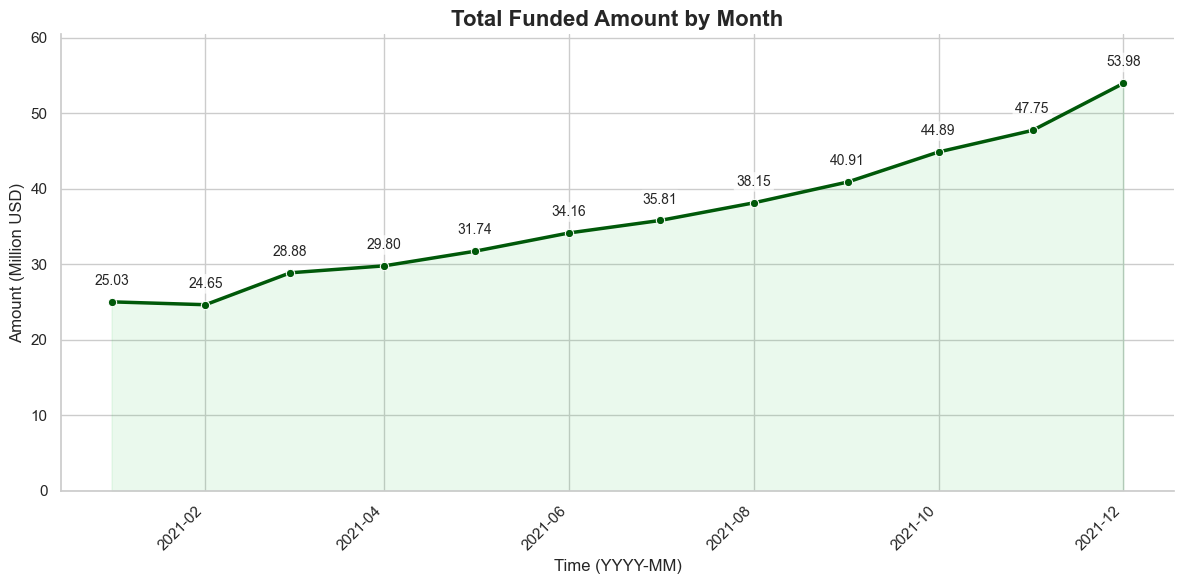

In [46]:
total_funded_amount_time = (datetime.groupby('time', as_index=False)['loan_amount']
                           .sum()
                           .rename(columns={'loan_amount': 'total_funded_amount'}))

total_funded_amount_time['time'] = total_funded_amount_time['time'].astype(str)

# Convert to Million
total_funded_amount_time['total_funded_amount'] = round(total_funded_amount_time['total_funded_amount'] / 1000000, 2)

total_funded_amount_time['time'] = pd.to_datetime(total_funded_amount_time['time'])
total_funded_amount_time = total_funded_amount_time.sort_values('time')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Line + markers
ax = sns.lineplot(
    data=total_funded_amount_time,
    x='time', y='total_funded_amount',
    linewidth=2.5, marker='o', markersize=6,
    color="#005909"   # xanh nhã, chuyên nghiệp
)

for x, y in zip(total_funded_amount_time['time'], total_funded_amount_time['total_funded_amount']):
    ax.annotate(
        f"{y:,.2f}",          # hiện 2 số thập phân, có phân tách nghìn
        xy=(x, y),            # vị trí điểm
        xytext=(0, 10),        # dịch nhãn lên 10px
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)  # nền trắng dễ đọc
    )

ax.set_ylim(0, total_funded_amount_time['total_funded_amount'].max()*1.12)

ax.fill_between(total_funded_amount_time['time'], total_funded_amount_time['total_funded_amount'],
                alpha=0.10, color="#35C855")

ax.set_title("Total Funded Amount by Month", fontsize=16, weight='bold')
ax.set_xlabel("Time (YYYY-MM)", fontsize=12)
ax.set_ylabel("Amount (Million USD)", fontsize=12)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45, ha='right')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.tight_layout()
plt.show()

### Regional Analysis by State

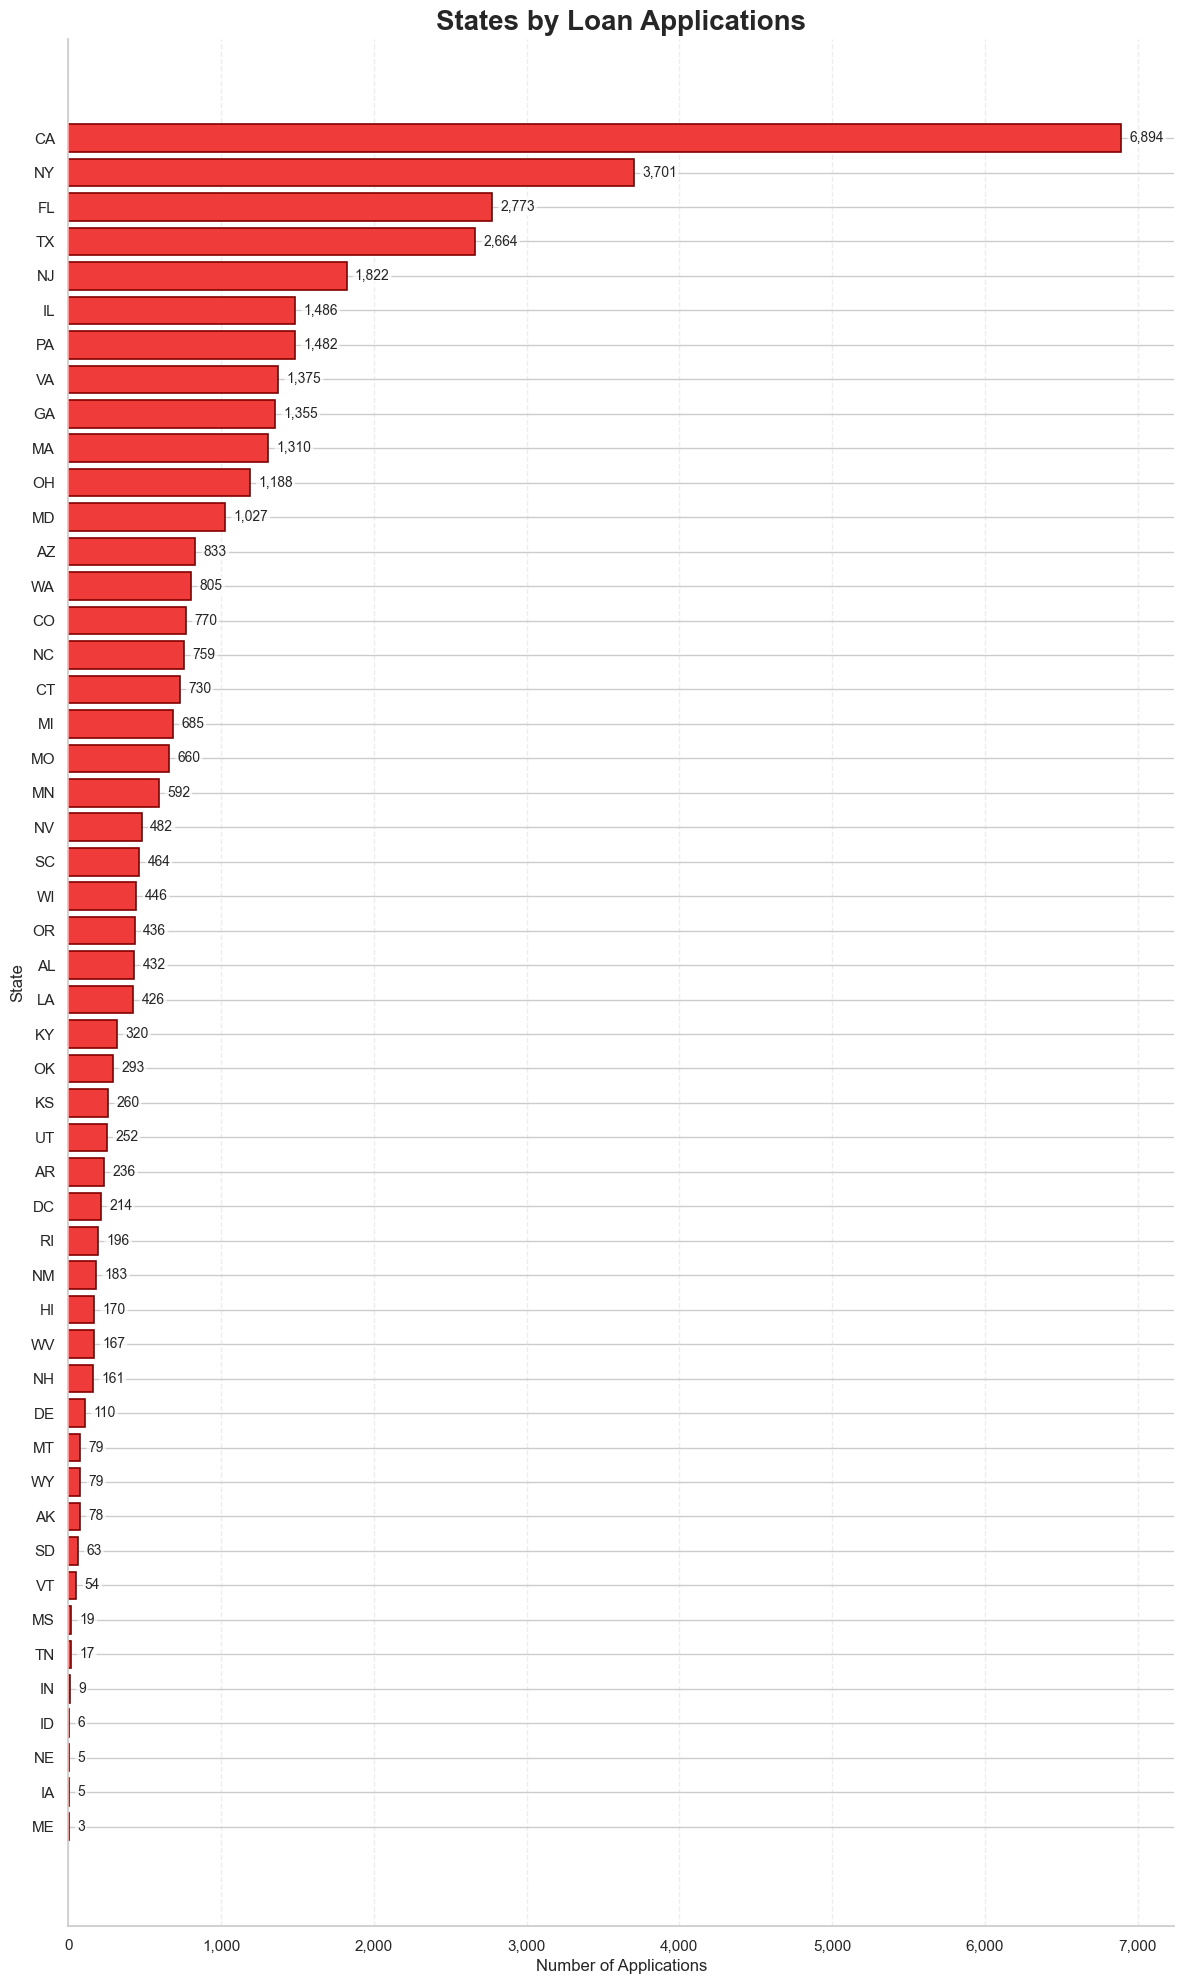

In [47]:
total_applications_by_state = df.groupby('address_state', as_index=False)['id'].count().rename(columns={'id': 'total_applications'})

df_plot = (
    total_applications_by_state
    .copy()
    .sort_values('total_applications', ascending=False)  # ensure descending order
)

# Colors (customize as you like)
fill_color = "#F03B3B"   # bar color
edge_color = "#830000"   # bar edge color

# Dynamic figure height: ~0.40 inch per state, min 6 inches
height = max(6, 0.40 * len(df_plot))
fig, ax = plt.subplots(figsize=(12, height))

bars = ax.barh(
    y=df_plot['address_state'].astype(str),
    width=df_plot['total_applications'],
    color=fill_color, edgecolor=edge_color, linewidth=1.2
)

# Add data labels at the end of each bar
for rect in bars:
    w = rect.get_width()
    y = rect.get_y() + rect.get_height() / 2
    ax.annotate(
        f"{w:,.0f}",                     # thousands separator, no decimals
        xy=(w, y), xytext=(6, 0), textcoords="offset points",
        ha='left', va='center', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="none", alpha=0.7)
    )

# Title and axis labels
ax.set_title("States by Loan Applications", fontsize=20, fontweight="bold")
ax.set_xlabel("Number of Applications", fontsize=12)
ax.set_ylabel("State", fontsize=12)

# Format the X axis with thousands separators
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x):,}"))

# Light grid and clean look
ax.grid(axis='x', linestyle='--', alpha=0.35)
ax.set_axisbelow(True)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

# Largest value on top
ax.invert_yaxis()

plt.tight_layout()
plt.show()

### Loan Term Analysis by Total Funded Amout

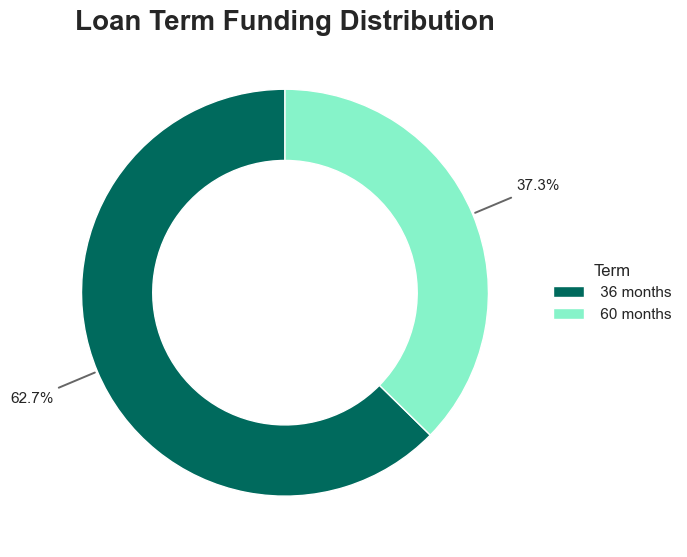

In [48]:
term_funding_million = round(df.groupby('term')['loan_amount'].sum() / 1000000, 2).reset_index()

# Data: term_funding_million with columns ['term', 'loan_amount'] (Million USD)
df_plot = term_funding_million.copy()
df_plot['label'] = df_plot['term'].astype(str)  # ví dụ: '36 months', '60 months'
df_plot = df_plot.sort_values('loan_amount', ascending=False).reset_index(drop=True)

sizes = df_plot['loan_amount'].values
total = sizes.sum()
pct = sizes / total * 100

# Colors (customize here)
colors = ["#006A5D", "#86F3C9", "#1B3FA0", "#A5C8FF"][:len(df_plot)]

fig, ax = plt.subplots(figsize=(7, 7))

# Donut (no labels inside)
wedges, _ = ax.pie(
    sizes,
    colors=colors,
    startangle=90,
    radius=1.0,
    wedgeprops=dict(width=0.35, edgecolor="white", linewidth=1.0)
)

# Legend mapping color -> term
ax.legend(
    wedges, df_plot['label'],
    title="Term",
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
    frameon=False
)

# Percent labels OUTSIDE with arrows
for w, p in zip(wedges, pct):
    ang = (w.theta1 + w.theta2) / 2.0
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
    ax.annotate(
        f"{p:.1f}%",
        xy=(x*1.00, y*1.00),           # point at outer edge
        xytext=(x*1.35, y*1.35),       # text outside
        textcoords="data",
        ha="center", va="center", fontsize=11,
        arrowprops=dict(
            arrowstyle="-",
            lw=1.4, color="#666",
            connectionstyle="arc3,rad=0"   # straight line (or just remove this line)
        )
    )

# Title
ax.set_title("Loan Term Funding Distribution", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.show()

### Employee Length Analysis 

In [49]:
# 1) Normalize emp_length to number of years
s = df['emp_length'].astype('string').str.strip().str.lower()

years = pd.to_numeric(s.str.extract(r'(\d+)')[0], errors='coerce')
years[s.str.contains(r'<\s*1', na=False)] = 0        # "< 1 year" -> 0
years[s.str.contains(r'10\+',  na=False)] = 10       # "10+ years" -> 10
df['emp_years'] = years  # float với NaN

# 2) Assign group using apply (avoid np.select)
def bucket(v):
    if v < 1:               return '< 1 year'
    if 1 <= v <= 3:         return '1 - 3 years'
    if 3 < v <= 5:          return '3 - 5 years'
    if 5 < v <= 7:          return '5 - 7 years'
    if 7 < v <= 9:          return '7 - 9 years'
    return '10+ years'      # v >= 10

df['emp_length_group'] = df['emp_years'].apply(bucket)

# 3) Count applications by group
order = ['< 1 year','1 - 3 years','3 - 5 years','5 - 7 years','7 - 9 years','10+ years']
emp_len_counts = (
    df.groupby('emp_length_group')['id']
      .nunique()                              # đổi thành .count() nếu muốn đếm mọi dòng
      .reindex(order, fill_value=0)
      .reset_index(name='applications')
)

emp_len_counts['emp_length_group'] = pd.Categorical(emp_len_counts['emp_length_group'],
                                                    categories=order, ordered=True)
emp_len_counts = emp_len_counts.sort_values('emp_length_group').reset_index(drop=True)

emp_len_counts


,emp_length_group,applications
0,< 1 year,4575
1,1 - 3 years,11699
2,3 - 5 years,6701
3,5 - 7 years,4000
4,7 - 9 years,2731
5,10+ years,8870


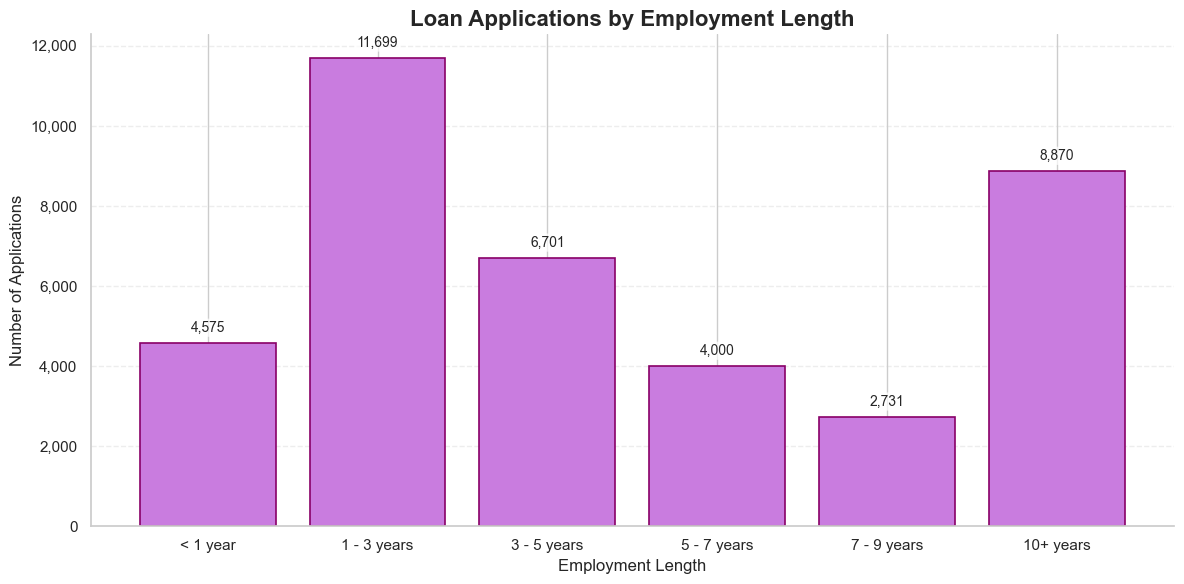

In [50]:
# Input: emp_len_counts with columns ['emp_length_group', 'applications']
order = ['< 1 year','1 - 3 years','3 - 5 years','5 - 7 years','7 - 9 years','10+ years','Unknown']
df_plot = emp_len_counts.copy()
df_plot['emp_length_group'] = pd.Categorical(df_plot['emp_length_group'], categories=order, ordered=True)
df_plot = df_plot.sort_values('emp_length_group').reset_index(drop=True)

# Colors (customize here)
fill_color = "#C97CDF"    # bar color
edge_color = "#890067"    # edge color

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(
    x=df_plot['emp_length_group'].astype(str),
    height=df_plot['applications'],
    color=fill_color, edgecolor=edge_color, linewidth=1.2
)

# Data labels on top of each bar
for rect in bars:
    h = rect.get_height()
    ax.annotate(
        f"{int(h):,}",
        xy=(rect.get_x() + rect.get_width()/2, h),
        xytext=(0, 6), textcoords="offset points",
        ha='center', va='bottom', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="none", alpha=0.7)
    )

# Title & axes
ax.set_title("Loan Applications by Employment Length", fontsize=16, fontweight="bold")
ax.set_xlabel("Employment Length", fontsize=12)
ax.set_ylabel("Number of Applications", fontsize=12)

# Aesthetics
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x):,}"))
ax.grid(axis='y', linestyle='--', alpha=0.35)
ax.set_axisbelow(True)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.xticks(rotation=0, ha='center')      # avoid label overlap
plt.tight_layout()
plt.show()

### Home Ownership Analysis

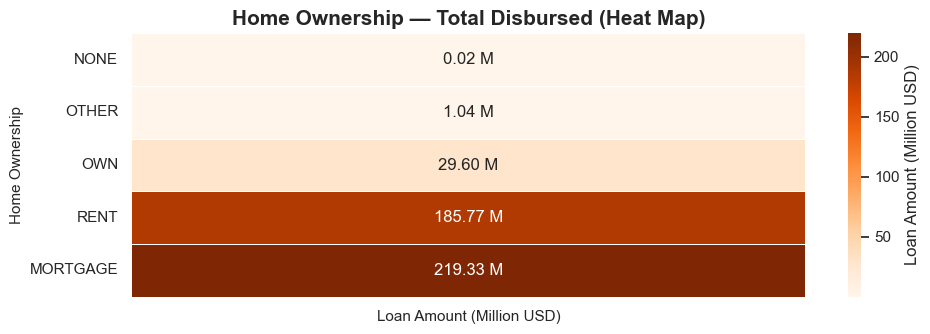

In [51]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()

# 1) Prepare data (Million USD)
df_plot = home_funding.copy()
df_plot['loan_amount_m'] = df_plot['loan_amount'] / 1_000_000

# Optional: control order of rows
# order = ['OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE']
# df_plot['home_ownership'] = pd.Categorical(df_plot['home_ownership'], categories=order, ordered=True)

matrix = (
    df_plot.sort_values('loan_amount_m', ascending=True)
           .set_index('home_ownership')[['loan_amount_m']]
)

# Labels with "M" suffix for annotations
labels = matrix.applymap(lambda v: f"{v:.2f} M")

# 2) Plot heatmap
sns.set_theme(style="white")
fig_h = max(3.5, 0.6 * len(matrix))  # dynamic height if categories are many
plt.figure(figsize=(10, fig_h))

ax = sns.heatmap(
    data=matrix,
    annot=labels, fmt="",              # show "x.xx M" in each cell
    cmap=sns.color_palette("Oranges", as_cmap=True),
    cbar_kws={"label": "Loan Amount (Million USD)"},
    linewidths=0.5, linecolor="white"
)

# Titles & axes
ax.set_title("Home Ownership — Total Disbursed (Heat Map)", fontsize=15, weight="bold")
ax.set_xlabel("")  # we’ll relabel the single column nicely
ax.set_ylabel("Home Ownership", fontsize=11)
ax.set_xticklabels(["Loan Amount (Million USD)"], rotation=0)

plt.tight_layout()
plt.show()